# 概要

## ツールの紹介
- NetworkX：ネットワーク分析ツールや複雑ネットワークの作成・編集ができる
- numpy：行列などの数値計算ツール
- matplotlib：可視化ツール

## データ構造
- GML
- GraphML
- XGMML 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 第２章ネットワーク概要

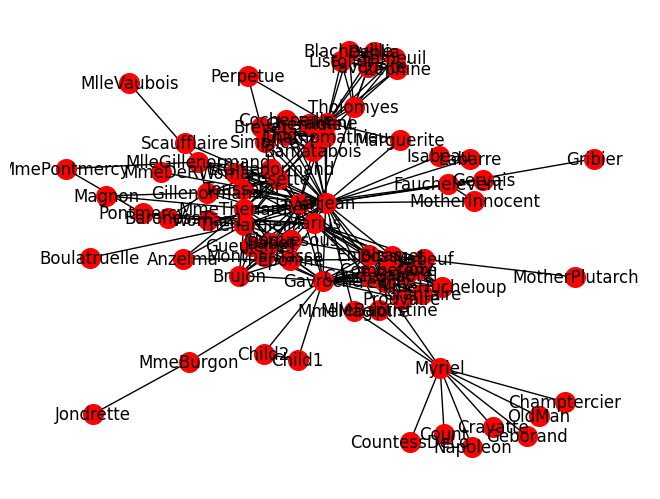

In [2]:
path = "lesmis.gml"
G = nx.read_gml(path)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True)

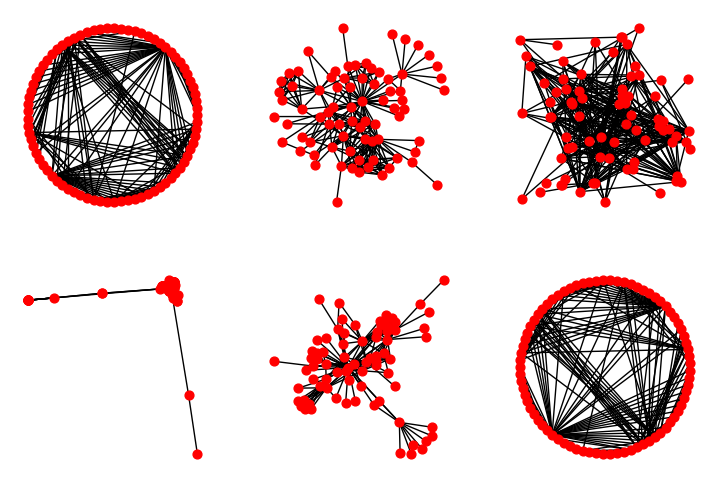

In [3]:
plt.figure(figsize=(9, 6))
plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color="red", with_labels=False)
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40, node_color="red", with_labels=False)
plt.subplot(233)
nx.draw_random(G, node_size=40, node_color="red", with_labels=False)
plt.subplot(234)
nx.draw_spectral(G, node_size=40, node_color="red", with_labels=False)
plt.subplot(235)
nx.draw_spring(G, node_size=40, node_color="red", with_labels=False)
plt.subplot(236)
nx.draw_shell(G, node_size=40, node_color="red", with_labels=False)

# グラフ理論

## 頂点リストと辺リストからグラフを生成
### グラフの生成
- グラフオブジェクトの生成：G = nx.Graph()
- 有向グラフオブジェクトの生成：G = nx.DiGraph()
- 頂点の追加：G.add_nodes_from(<頂点リスト>)
- 辺の追加：G.add_edges_from(<繋ぐ頂点タプルのリスト>)
- 重みつき辺の追加：G.add_weighted_edges_from(<(頂点1, 頂点2, 重み)のリスト>)
### 特殊なグラフの生成
- 完全グラフ：nx.complete_graph(<頂点数>)
- 完全2部グラフ：complete_bipartite_graph(<1グループの頂点数>, <2グループの頂点数>)
- ランダムグラフ：erdos_renyi_graph(<頂点数>>, <エッジ作成の確率>)
- スターグラフ：star_graph(<繋ぐ頂点数>)
- Barabasi-Albertグラフ：barabasi_albert_graph(<頂点数>, <新しいノードから既存のノードへ接続する数>)
- barbellグラフ：barbell_graph(<片方の頂点数>, <グラフ同士をつなぐパスの長さ>)

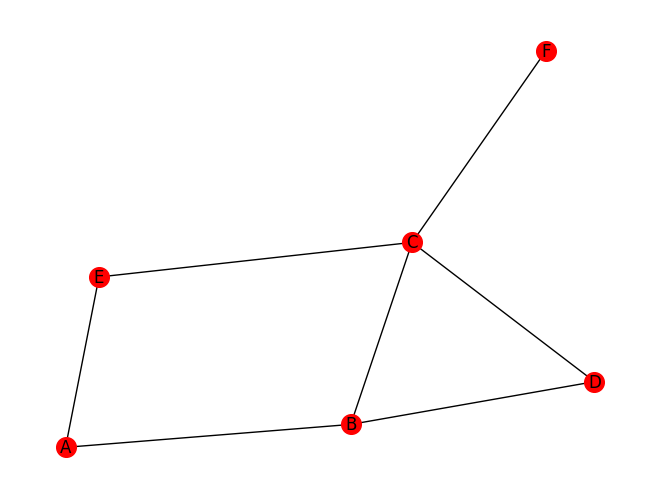

In [4]:
# ノードの生成
G = nx.Graph()
# 頂点(ノード)の追加
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
# 辺(エッジ)の追加
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])

# 可視化
# nx.draw(<グラフ>, node_size=<ノードのサイズ>, node_color=<ノードの色>, with_labels=<ラベルを表示するかどうか>)
nx.draw(G, node_size=200, node_color="red", with_labels=True)

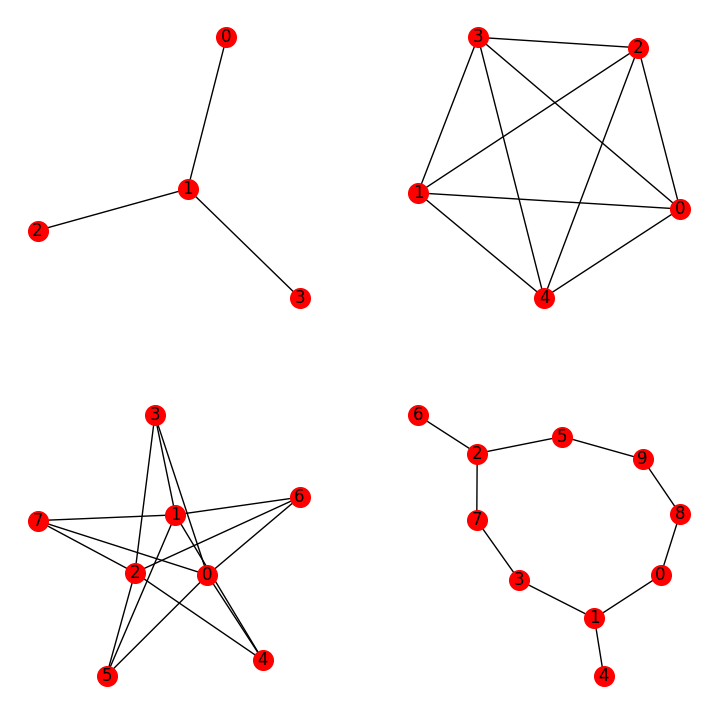

In [5]:
plt.figure(figsize=(9, 9))
# 数値を頂点としたグラフ
Gn = nx.Graph()
Gn.add_nodes_from([i for i in range(4)])
Gn.add_edges_from([(0, 1), (1, 2), (1, 3)])
plt.subplot(221)
nx.draw(Gn, node_size=200, node_color="red", with_labels=True)

# 完全グラフ
K_5 = nx.complete_graph(5)
plt.subplot(222)
nx.draw(K_5, node_size=200, node_color="red", with_labels=True)

# 完全2部グラフ：complete_bipartite_graph(<1グループの頂点数>, <2グループの頂点数>)
K_3_5 = nx.complete_bipartite_graph(3, 5)
plt.subplot(223)
nx.draw(K_3_5, node_size=200, node_color="red", with_labels=True)

# ランダムグラフ：erdos_renyi_graph(<頂点数>>, <エッジ作成の確率>)
er = nx.erdos_renyi_graph(10, 0.25)
plt.subplot(224)
nx.draw(er, node_size=200, node_color="red", with_labels=True)

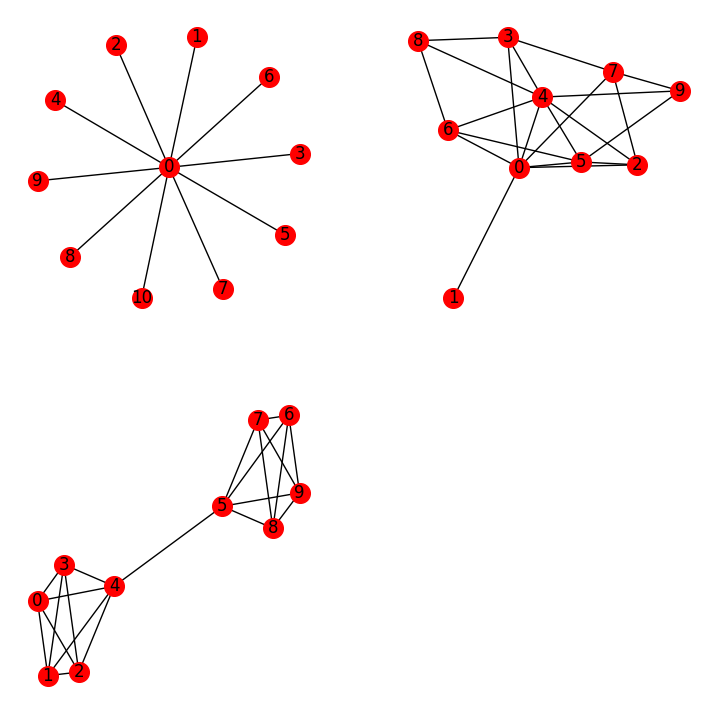

In [6]:
plt.figure(figsize=(9, 9))
# スターグラフ：star_graph(<繋ぐ頂点数>)
star = nx.star_graph(10)
plt.subplot(221)
nx.draw(star, node_size=200, node_color="red", with_labels=True)

# Barabasi-Albertグラフ：barabasi_albert_graph(<頂点数>, <新しいノードから既存のノードへ接続する数>)
# 次数の大きな頂点ほど繋がりやすいグラフ
ba = nx.barabasi_albert_graph(10, 3)
plt.subplot(222)
nx.draw(ba, node_size=200, node_color="red", with_labels=True)

# barbellグラフ：barbell_graph(<片方の頂点数>, <グラフ同士をつなぐパスの長さ>)
# 2つの完全グラフがつながったグラフ
bg = nx.barbell_graph(5, 0)
plt.subplot(223)
nx.draw(bg, node_size=200, node_color="red", with_labels=True)

## 様々な可視化の方法
※オプションは同様
1. 標準：nx.draw(<グラフ>, node_size=<ノードのサイズ>, node_color=<ノードの色>, with_labels=<ラベルを表示するかどうか>) = nx.draw_networkx(G)
2. 頂点をランダムに配置：nx.draw_random(G)
3. 同心円状に配置：nx.draw_circular(G)
4. バネ配置のアルゴリズム：nx.dra_spring(G)
5. Kamada-Kawaiのアルゴリズム：nx.draw_kamada_kawai(G)
6. planarのアルゴリズム：nx.draw_planar(G)

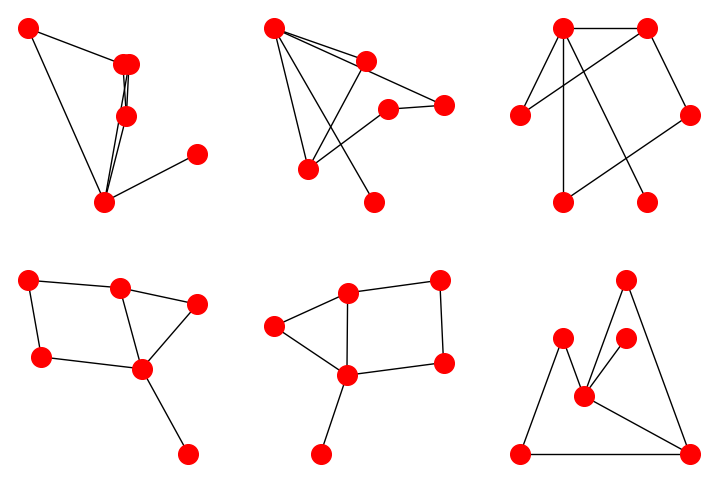

In [7]:
plt.figure(figsize=(9, 6))
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])

# 辺(エッジ)の追加
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])

# 標準
plt.subplot(231)
nx.draw_random(G, node_size=200, node_color="red", with_labels=False)

# 頂点をランダムに配置
plt.subplot(232)
nx.draw_random(G, node_size=200, node_color="red", with_labels=False)

# 同心円状に配置
plt.subplot(233)
nx.draw_circular(G, node_size=200, node_color="red", with_labels=False)

# バネ配置
plt.subplot(234)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=False)

# Kamada-Kawaiのアルゴリズム
plt.subplot(235)
nx.draw_kamada_kawai(G, node_size=200, node_color="red", with_labels=False)

# planarのアルゴリズム
plt.subplot(236)
nx.draw_planar(G, node_size=200, node_color="red", with_labels=False)

## グラフの情報の取得

In [8]:
print("ノード数：", G.number_of_nodes())
print("ノードリスト：", G.nodes())
print("辺数：", G.number_of_edges())
print("辺リスト：", G.edges())
print("情報一覧：", G)

ノード数： 6
ノードリスト： ['A', 'B', 'C', 'D', 'E', 'F']
辺数： 7
辺リスト： [('A', 'B'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('C', 'F')]
情報一覧： Graph with 6 nodes and 7 edges


In [9]:
print("行列の各要素：\n", nx.adjacency_matrix(G), )
print("隣接行列：\n", nx.adjacency_matrix(G).todense())

行列の各要素：
   (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 2)	1
  (5, 2)	1
隣接行列：
 [[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


## 次数

次数： [('A', 2), ('B', 3), ('C', 4), ('D', 2), ('E', 2), ('F', 1)]
ヒストグラム： [0, 1, 3, 1, 1]
ヒストグラムの可視化


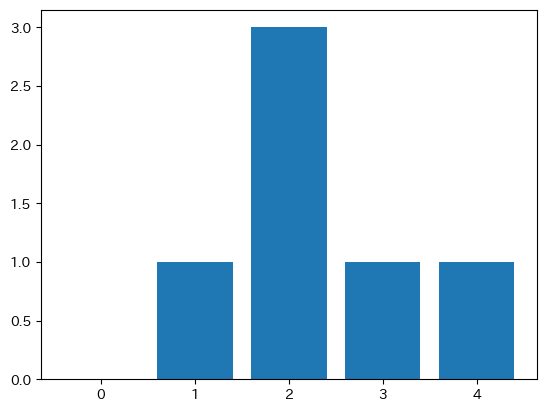

In [10]:
print("次数：", G.degree())
print("ヒストグラム：", nx.degree_histogram(G))
print("ヒストグラムの可視化")
plt.bar(range(5), height=nx.degree_histogram(G))
plt.show()

## 有向グラフ

DiGraph with 6 nodes and 7 edges


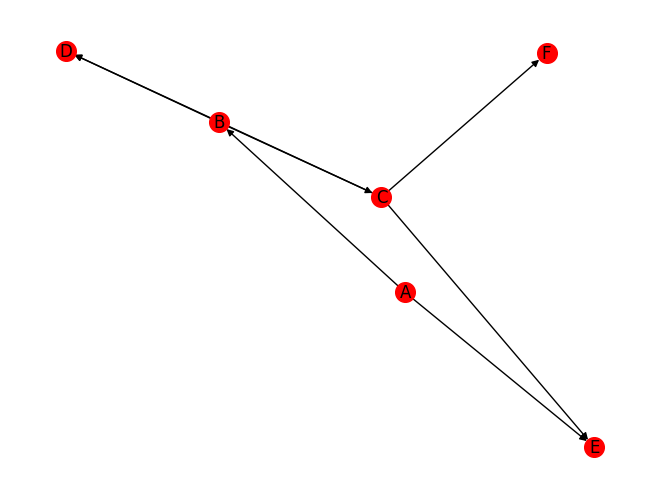

In [11]:
# 有向グラフオブジェクトの生成
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
print(G)
nx.draw(G, node_size=200, node_color="red", with_labels=True)

## 転置行列・有向グラフから無向グラフに変換

隣接行列：
 [[0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
転置行列：
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]]


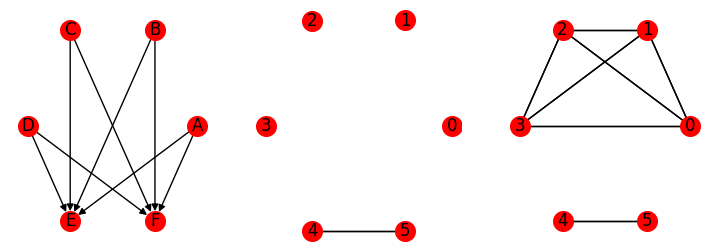

In [12]:
plt.figure(figsize=(9, 3))
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "E"), ("A", "F"), ("B", "E"), ("B", "F"), ("C", "E"), ("C", "F"), ("D", "E"), ("D", "F")])
plt.subplot(131)
nx.draw_circular(G, node_size=200, node_color="red", with_labels=True)

# 転置行列
A = nx.adjacency_matrix(G).todense()
AT = A.transpose()
print("隣接行列：\n", A)
print("転置行列：\n", AT)

# 共引用
plt.subplot(132)
GC = nx.MultiGraph()
GC.add_nodes_from([i for i in range(5)])
M = np.dot(AT, A)
M = M - np.diag(np.diag(M))
for i, row in enumerate(M):
    for j, n in enumerate(row):
        if(n > 0):
            GC.add_edge(i, j)
nx.draw_circular(GC, node_size=200, node_color="red", with_labels=True)

# 書誌引用
plt.subplot(133)
GB = nx.MultiGraph()
GB.add_nodes_from([i for i in range(5)])
M = np.dot(A, AT)
M = M - np.diag(np.diag(M))
for i, row in enumerate(M):
    for j, n in enumerate(row):
        if(n > 0):
            GC.add_edge(i, j)
nx.draw_circular(GC, node_size=200, node_color="red", with_labels=True)


## パス

In [13]:
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])
A = nx.adjacency_matrix(G).todense()
print("パス")
for path in nx.all_simple_paths(G, "D", "E"):
    print(path)

パス
['D', 'B', 'A', 'E']
['D', 'B', 'C', 'E']
['D', 'C', 'B', 'A', 'E']
['D', 'C', 'E']


## 隣接行列・転置行列

In [14]:
print("隣接行列：\n", A)
print("パスの長さ2で進める頂点数：\n", A**2)

隣接行列：
 [[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]
パスの長さ2で進める頂点数：
 [[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


## 連結
- 連結数：nx.number_connected_components(<グラフオブジェクト>)

削除前の連結数： 1
削除後の連結数： 2


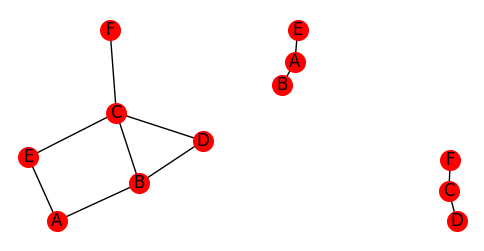

In [15]:
plt.figure(figsize=(6, 3))
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D"), ("A", "E"), ("C", "E"), ("C", "F")])

plt.subplot(121)
nx.draw(G, node_size=200, node_color="red", with_labels=True)
print("削除前の連結数：", nx.number_connected_components(G))

plt.subplot(122)
# 連結成分の削除
G.remove_edges_from([("B", "C"), ("C", "E"), ("D", "B")])
nx.draw(G, node_size=200, node_color="red", with_labels=True)
print("削除後の連結数：", nx.number_connected_components(G))

## パス
- パス：nx.all_simple_paths(G, <頂点1>, <頂点2>) → <頂点を経由順に並べたリストのリスト>
- 最短経路のパス数：nx.shortest_path_length(G, <頂点1>, <頂点2>)

パス(D→E)
['D', 'E']
['D', 'A', 'C', 'B', 'F', 'E']
最短経路のパス数 1
パス(E→D)
['E', 'C', 'B', 'F', 'D']
最短経路のパス数 4


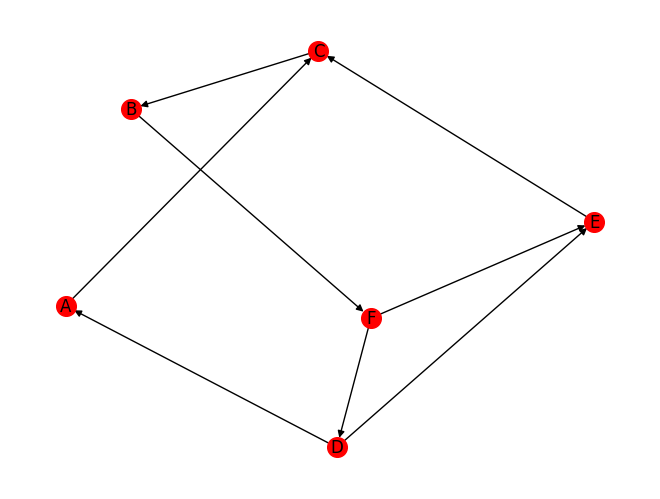

In [16]:
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "C"), ("C", "B"), ("B", "F"), ("F", "D"), ("F", "E"), ("D", "E"), ("E", "C"), ("D", "A")])

nx.draw(G, node_size=200, node_color="red", with_labels=True)

print("パス(D→E)")
for path in nx.all_simple_paths(G, "D", "E"):
    print(path)
print("最短経路のパス数", nx.shortest_path_length(G, "D", "E"))

print("パス(E→D)")
for path in nx.all_simple_paths(G, "E", "D"):
    print(path)
print("最短経路のパス数", nx.shortest_path_length(G, "E", "D"))

## クラスタ係数
- クラスタ係数：nx.clustering(<グラフオブジェクト>, 0)

完全グラフのクラスタ係数： 1.0
完全２部グラフのクラスタ係数： 0
ランダムグラフのクラスタ係数： 0.2


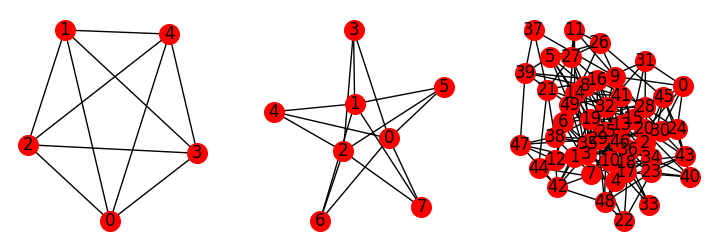

In [17]:
plt.figure(figsize=(9, 3))
K_5 = nx.complete_graph(5)
plt.subplot(131)
nx.draw(K_5, node_size=200, node_color="red", with_labels=True)
K_3_5 = nx.complete_bipartite_graph(3, 5)
plt.subplot(132)
nx.draw(K_3_5, node_size=200, node_color="red", with_labels=True)
er = nx.erdos_renyi_graph(50, 0.15)
plt.subplot(133)
nx.draw(er, node_size=200, node_color="red", with_labels=True)

print("完全グラフのクラスタ係数：", nx.clustering(K_5, 0))
print("完全２部グラフのクラスタ係数：", nx.clustering(K_3_5, 0))
print("ランダムグラフのクラスタ係数：", nx.clustering(er, 0))

## 次数相関
- 次数相関：nx.degree_pearson_correlation_coefficient(<グラフオブジェクト>, 0)

スターグラフの次数相関： -1.0
Brabasi-Albertグラフの次数相関： -0.33777777777777773
barbellグラフの次数相関： -0.05000000000000002


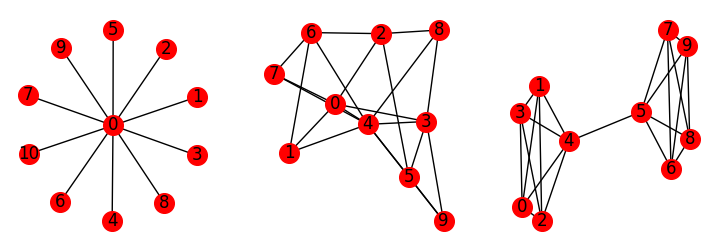

In [18]:
plt.figure(figsize=(9, 3))
star = nx.star_graph(10)
plt.subplot(131)
nx.draw(star, node_size=200, node_color="red", with_labels=True)
ba = nx.barabasi_albert_graph(10, 3)
plt.subplot(132)
nx.draw(ba, node_size=200, node_color="red", with_labels=True)
bg = nx.barbell_graph(5, 0)
plt.subplot(133)
nx.draw(bg, node_size=200, node_color="red", with_labels=True)

print("スターグラフの次数相関：", nx.degree_pearson_correlation_coefficient(star, 0))
print("Brabasi-Albertグラフの次数相関：", nx.degree_pearson_correlation_coefficient(ba, 0))
print("barbellグラフの次数相関：", nx.degree_pearson_correlation_coefficient(bg, 0))